### CSED490C
### LAB 2
### Jeongseop Yi (49004543)

### Q3

##### 1)

The only floating point operation in kernel code is `Cvalue += ds_A[ty][k] * ds_B[k][tx]`. There are two floating point operations in this line of code.

The matrices A and B are padded if they are not in multiples of `TILE_WIDTH`.

These padded cells have value of 0, but they are included in the calcuation for calculating the cell in Matrix C.

There are `TILE_WIDTH * ((numAColumnns - 1) / TILE_WIDTH + 1)` columns in padded matrix A and `TILE_WIDTH * ((numBRows - 1) / TILE_WIDTH + 1)` rows in padded matrix B. Let above values be `numPadAColumns` and `numPadBRows`, respectively.

Then for each cell in matrix C, there are `numPadAColumns * numPadBRows` executions of above line, which means that there are `2 * numPadAColumns * numPadBRows` floating point operations.

There are `numCColumns * numCRows` cells in matrix C, therefore there are `2 * numPadAColumns * numPadBRows * numCColumns * numCRows` floating point operations in the kernel code.

##### 2)

Global byte read occurs when copying the input from host to device for matrices A and B. In total, there are `(numAColumns * numARows + numBColumns * numBRows) * sizeof(float)` bytes of global memory read.

##### 3)

Global byte write occurs when copying result from device to host for matrix C. In total, there are `(numCColumns * numCRows) * sizeof(float)` bytes of global memory write. 


##### 4)

Streaming may be implemented to reduce the total running time by reading global memory while other threads are computing.

##### 5)

`template.cu` is included in the assignment submission package.

##### 6)

The execution was done on cse-edu cluster with `srun -p titanxp -N 1 -n 6 --mem=32G --gres=gpu:2 --pty /bin/bash -l` command with `TILE_WIDTH=32`.

![matrixMultiplyShared execution times.png](<attachment:matrixMultiplyShared execution times.png>)

##### Raw Data Table

| Test # | Size             | Import data to host | Allocate GPU memory | Copy data to device | Compute  | Copy output to host | Free GPU memory | Total (only GPU) | Total (including host) |
|--------|------------------|---------------------|---------------------|---------------------|----------|---------------------|-----------------|------------------|------------------------|
|      0 | 16x16            |             2.63316 |            0.340406 |            0.781863 | 0.063505 |            0.030747 |        0.162312 |         1.378833 |               4.011993 |
|      1 | 64x64            |             8.10882 |             0.33477 |            0.109996 | 0.088691 |            0.048001 |        0.200229 |         0.781687 |               8.890507 |
|      2 | 64x64 (128)      |             8.05864 |            0.193213 |            0.079571 |  0.06082 |            0.033503 |        0.130919 |         0.498026 |               8.556666 |
|      3 | 112x16 (48)      |             3.86424 |            0.153312 |            0.057147 | 0.059008 |            0.023569 |        0.104529 |         0.397565 |               4.261805 |
|      4 | 168x168          |             28.5098 |            0.228024 |              1.8561 | 0.061205 |            0.079208 |         0.19957 |         2.424107 |              30.933907 |
|      5 | 512x512 (510)    |             177.778 |            0.278666 |            0.522663 | 0.186346 |            0.772894 |        0.204169 |         1.964738 |             179.742738 |
|      6 | 1024x1000 (1024) |             406.057 |            0.380368 |             1.16741 |  1.23319 |            0.602947 |        0.385554 |         3.769469 |             409.826469 |
|      7 | 1024x1500 (2048) |             1014.12 |            0.363002 |             2.31372 |   3.5711 |             2.20747 |        0.722436 |         9.177728 |            1023.297728 |
|      8 | 4096x512 (8000)  |             6720.79 |            0.461746 |             14.0161 |  18.4201 |             2.27539 |         3.98076 |        39.154096 |            6759.944096 |


##### 7)

The exection was done on cse-edu cluster with `srun -p titanxp -N 1 -n 6 --mem=32G --gres=gpu:2 --pty /bin/bash -l` command.

![Execution times with different tile widths.png](<attachment:Execution times with different tile widths.png>)

##### Raw Data Table

| Test # | TILE_WIDTH | Import data to host | Allocate GPU memory | Copy data to device | Compute | Copy output to host | Free GPU memory | Total (only GPU) | Total (including host) |
|--------|------------|---------------------|---------------------|---------------------|---------|---------------------|-----------------|------------------|------------------------|
|      0 |          2 |             6630.84 |            0.456745 |             14.3715 | 815.646 |             2.08103 |         3.99529 |       836.550565 |            7467.390565 |
|      1 |          4 |              6598.7 |            0.459855 |              14.225 | 120.668 |             2.03641 |         3.97737 |       141.366635 |            6740.066635 |
|      2 |          8 |             6701.41 |            0.457706 |             14.1724 | 47.2746 |             2.25411 |         4.00314 |        68.161956 |            6769.571956 |
|      3 |         12 |             6660.54 |            0.467803 |             14.1007 | 25.8162 |             2.65672 |         7.38273 |        50.424153 |            6710.964153 |
|      4 |         16 |             6716.91 |            0.476233 |             14.1739 | 20.1227 |             2.61286 |         3.98701 |        41.372703 |            6758.282703 |
|      5 |         24 |             6439.52 |            0.440172 |             14.0728 | 20.5692 |             2.21944 |         3.99789 |        41.299502 |            6480.819502 |
|      6 |         32 |             6718.58 |            0.472083 |              14.211 | 18.4156 |             2.67518 |         3.98671 |        39.760573 |            6758.340573 |
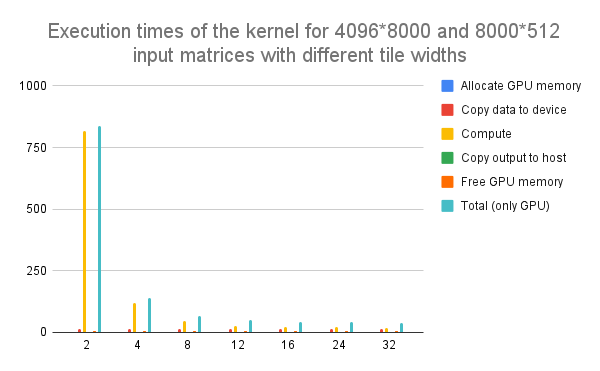
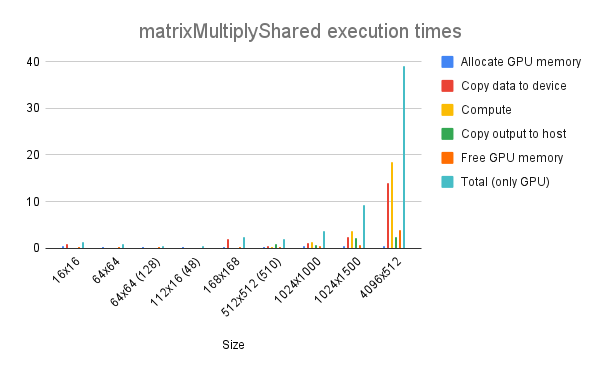